Dữ liệu cung cấp chứa các thông số thời tiết cho thành phố Hồ Chí Minh, với các biến liên quan đến nhiệt độ, độ ẩm, lượng mưa, gió, áp suất không khí, v.v. Dưới đây là các thông số mô tả cơ bản về dữ liệu:

Các thông số mô tả dữ liệu:
- Tên các cột (Features):
- name: Tên địa điểm (ví dụ: "Ho chi minh").
- datetime: Thời gian (ngày/tháng/năm).
- tempmax: Nhiệt độ tối đa trong ngày (°C).
- tempmin: Nhiệt độ tối thiểu trong ngày (°C).
- temp: Nhiệt độ trung bình trong ngày (°C).
- feelslikemax: Nhiệt độ cảm nhận tối đa (°C).
- feelslikemin: Nhiệt độ cảm nhận tối thiểu (°C).
- feelslike: Nhiệt độ cảm nhận trung bình (°C).
- dew: Điểm sương (°C).
- humidity: Độ ẩm (%) của không khí.
- precip: Lượng mưa (mm).
- precipprob: Xác suất mưa (%).
- precipcover: Diện tích phủ mưa (%) trong khu vực.
- preciptype: Loại mưa (ví dụ: rain, snow).
- snow: Lượng tuyết (mm).
- snowdepth: Độ sâu tuyết (mm).
- windgust: Tốc độ gió mạnh nhất (km/h).
- windspeed: Tốc độ gió trung bình (km/h).
- winddir: Hướng gió (độ).
- sealevelpressure: Áp suất không khí ở mực nước biển (hPa).
- cloudcover: Tỉ lệ mây che phủ bầu trời (%).
- visibility: Tầm nhìn (km).
- solarradiation: Bức xạ mặt trời (W/m²).
- solarenergy: Năng lượng mặt trời (kWh).
- uvindex: Chỉ số tia UV.
- severerisk: Mức độ rủi ro thời tiết cực đoan (0-1).
- sunrise: Thời gian mặt trời mọc.
- sunset: Thời gian mặt trời lặn.
- moonphase: Giai đoạn trăng.
- conditions: Các điều kiện thời tiết (mưa, nắng, v.v.).
- description: Mô tả chi tiết thời tiết trong ngày.
- icon: Biểu tượng mô tả thời tiết.
- stations: Mã trạm quan trắc thời tiết.

**Import các thư viện**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import datetime
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Đọc dữ liệu
df = pd.read_csv('/content/Ho chi minh 2023-01-01 to 2024-12-03.csv')
# In các tên cột trong dataset
print("Tên các cột trong dữ liệu:")
print(df.columns)
# In số hàng và cột trong dataset
print("\nSố hàng và số cột trong dữ liệu:")
print(df.shape)

print("\nThông tin tổng quan về dữ liệu:")
print(df.info())

Tên các cột trong dữ liệu:
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

Số hàng và số cột trong dữ liệu:
(703, 33)

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              703 non-null    object 
 1   datetime          703 non-null    object 
 2   tempmax           703 non-null    float64
 3   tempmin           703 non-null    float64
 4   temp              703 non-

**In 5 hàng đầu của tập dữ liệu**

In [ ]:
df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Ho chi minh,2023-01-01,31.0,23.0,26.5,33.2,23.0,27.4,19.7,67.3,...,13.6,7,10,2023-01-01T06:11:25,2023-01-01T17:41:42,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"48894099999,48900099999,VVTS"
1,Ho chi minh,2023-01-02,32.0,23.0,26.7,36.8,23.0,28.7,22.7,79.6,...,16.1,8,10,2023-01-02T06:11:49,2023-01-02T17:42:14,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"
2,Ho chi minh,2023-01-03,33.0,24.0,28.1,36.1,24.0,29.8,22.3,73.4,...,19.1,8,10,2023-01-03T06:12:12,2023-01-03T17:42:47,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"
3,Ho chi minh,2023-01-04,32.7,24.0,27.6,35.1,24.0,28.6,19.9,64.2,...,10.1,6,10,2023-01-04T06:12:34,2023-01-04T17:43:20,0.41,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"
4,Ho chi minh,2023-01-05,28.0,24.0,25.8,30.1,24.0,26.4,20.5,72.4,...,1.8,1,10,2023-01-05T06:12:56,2023-01-05T17:43:53,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"


**Data Preprocessing**

**Kiểm tra missing values trong tập dataset**

In [ ]:
missing_values = df.isnull().sum()

print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)

print("\nCác cột có giá trị thiếu:")
print(missing_values[missing_values > 0])

print("\nCác giá trị trong cột preciptype:")
print(df['preciptype'].unique())

Số lượng giá trị thiếu trong mỗi cột:
name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          218
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

Các cột có giá trị thiếu:
preciptype    218
dtype: int64

Các giá trị trong cột preciptype:
['rain' nan]


**Tính phần trăm của missing values đề từ đó ra phương án xử lý là nên xóa hay không**

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Tỷ lệ phần trăm các giá trị thiếu trong mỗi cột:")
print(missing_percentage)
print("\nCác cột có tỷ lệ phần trăm giá trị thiếu:")
print(missing_percentage[missing_percentage > 0])


Tỷ lệ phần trăm các giá trị thiếu trong mỗi cột:
name                 0.000000
datetime             0.000000
tempmax              0.000000
tempmin              0.000000
temp                 0.000000
feelslikemax         0.000000
feelslikemin         0.000000
feelslike            0.000000
dew                  0.000000
humidity             0.000000
precip               0.000000
precipprob           0.000000
precipcover          0.000000
preciptype          31.009957
snow                 0.000000
snowdepth            0.000000
windgust             0.000000
windspeed            0.000000
winddir              0.000000
sealevelpressure     0.000000
cloudcover           0.000000
visibility           0.000000
solarradiation       0.000000
solarenergy          0.000000
uvindex              0.000000
severerisk           0.000000
sunrise              0.000000
sunset               0.000000
moonphase            0.000000
conditions           0.000000
description          0.000000
icon                 

**Ta tiến hành tính toán ma trận tương quan để chọn ra các features thích hợp, từ đó ta sẽ dựa vào các features này và thực hiện một bài toán phân loại nhỏ đế tiến hành điền các giá trị preciptype bị thiếu**

In [ ]:
# Make a copy of the dataset
df_copy = df.copy()

# Convert 'preciptype' to binary directly
df_copy['preciptype_binary'] = df_copy['preciptype'].apply(lambda x: 1 if x == 'rain' else 0)

# Select numerical features
numerical_features = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation of numerical features with 'preciptype_binary'
correlation = df_copy[numerical_features].corrwith(df_copy['preciptype_binary'])

# Sort correlations in descending order
correlation_sorted = correlation.sort_values(ascending=False)

print(correlation_sorted)


preciptype_binary    1.000000
precipprob           0.974008
humidity             0.669061
cloudcover           0.601374
dew                  0.599056
severerisk           0.540494
precipcover          0.510650
feelslikemax         0.356353
winddir              0.325327
precip               0.285096
windspeed            0.143252
feelslike            0.128067
tempmin              0.034204
moonphase           -0.002577
feelslikemin        -0.019621
windgust            -0.096738
temp                -0.203437
visibility          -0.309407
uvindex             -0.337679
tempmax             -0.349923
sealevelpressure    -0.469030
solarradiation      -0.469504
solarenergy         -0.470061
snow                      NaN
snowdepth                 NaN
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**Dựa vào các giá trị tính từ ma trận tương quan ta có thể manually chọn ra các features quan trọng để dự đoán**

In [ ]:
important_features = ['precipprob', 'humidity', 'cloudcover', 'dew', 'severerisk']
X_important = df_copy[important_features]

correlation_matrix_important = X_important.corr()
print(correlation_matrix_important)



            precipprob  humidity  cloudcover       dew  severerisk
precipprob    1.000000  0.679714    0.592557  0.612219    0.556963
humidity      0.679714  1.000000    0.636183  0.816206    0.530739
cloudcover    0.592557  0.636183    1.000000  0.448762    0.293722
dew           0.612219  0.816206    0.448762  1.000000    0.602553
severerisk    0.556963  0.530739    0.293722  0.602553    1.000000


**Các features ta chọn đế tiến hành thực hiện bài toán phân loại**

In [ ]:
selected_features = ['precipprob', 'humidity', 'cloudcover']

**Tiến hành xây dựng model Logistic Regression và điền vào các giá trị còn thiếu của cột preciptype**

In [ ]:
df_copy = df.copy()
selected_features = ['precipprob', 'humidity', 'cloudcover']

le = LabelEncoder()
df_copy['preciptype_binary'] = le.fit_transform(df_copy['preciptype'].fillna('no rain'))

train_data = df_copy.dropna(subset=['preciptype_binary'])

# Định nghĩa X và y cho training mô hình
X_train = train_data[selected_features]
y_train = train_data['preciptype_binary']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Đánh giá test set
y_pred = model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Dự đoán giá trị thiếu trong preciptype
missing_data = df_copy[df_copy['preciptype'].isna()]
X_missing = missing_data[selected_features]
X_missing_scaled = scaler.transform(X_missing) # Scale missing data features
# Dự đoán các giá trị thiếu
predicted_preciptype = model.predict(X_missing_scaled)

# Điền giá trị dự đoán vào missing values của cột preciptype
df_copy.loc[df_copy['preciptype'].isna(), 'preciptype'] = le.inverse_transform(predicted_preciptype)

# Kiểm tra lại
print(df_copy['preciptype'].isna().sum())  # Kiểm tra xem có còn giá trị thiếu không

Accuracy on test set: 0.9858156028368794
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.98      0.99        93

    accuracy                           0.99       141
   macro avg       0.98      0.99      0.98       141
weighted avg       0.99      0.99      0.99       141

0


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Huấn luyện mô hình RandomForest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Dự đoán trên bộ kiểm tra
# y_pred_rf = rf_model.predict(X_test)

# # Đánh giá mô hình
# print("Accuracy on test set (Random Forest):", accuracy_score(y_test, y_pred_rf))

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix
# print("Confusion Matrix (Random Forest):")
# print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
df = df_copy.drop('preciptype_binary', axis=1)

**Kiểm tra lại % các missing values để đảm bảo dataset của ta đã clean**

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Tỷ lệ phần trăm các giá trị thiếu trong mỗi cột:")
print(missing_percentage)
print("\nCác cột có tỷ lệ phần trăm giá trị thiếu:")
print(missing_percentage[missing_percentage > 0])


Tỷ lệ phần trăm các giá trị thiếu trong mỗi cột:
name                0.0
datetime            0.0
tempmax             0.0
tempmin             0.0
temp                0.0
feelslikemax        0.0
feelslikemin        0.0
feelslike           0.0
dew                 0.0
humidity            0.0
precip              0.0
precipprob          0.0
precipcover         0.0
preciptype          0.0
snow                0.0
snowdepth           0.0
windgust            0.0
windspeed           0.0
winddir             0.0
sealevelpressure    0.0
cloudcover          0.0
visibility          0.0
solarradiation      0.0
solarenergy         0.0
uvindex             0.0
severerisk          0.0
sunrise             0.0
sunset              0.0
moonphase           0.0
conditions          0.0
description         0.0
icon                0.0
stations            0.0
dtype: float64

Các cột có tỷ lệ phần trăm giá trị thiếu:
Series([], dtype: float64)


**In giá trị của cột preciptype**

In [ ]:
value_counts_preciptype = df['preciptype'].value_counts()
print(value_counts_preciptype)

preciptype
rain       485
no rain    218
Name: count, dtype: int64


In [ ]:
df.sample(5)['preciptype'] # Kiểm tra lại

,preciptype
54,no rain
313,rain
307,rain
683,no rain
454,no rain


**Data Visualization**

Biểu đồ phân tán giữa nhiệt độ (temp) so với độ ẩm (humidity) cho (preciptype)

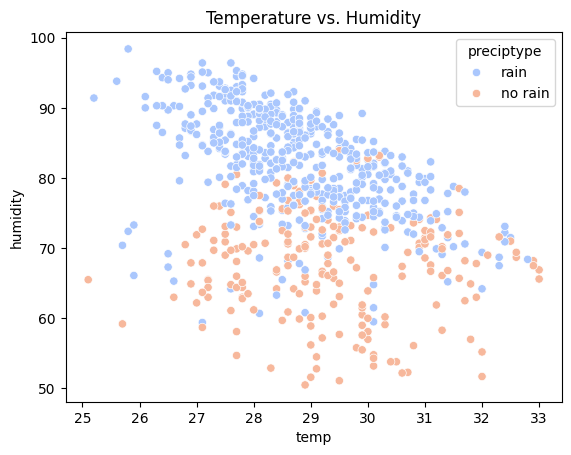

In [ ]:
sns.scatterplot(data=df, x='temp', y='humidity', hue='preciptype', palette='coolwarm')
plt.title("Temperature vs. Humidity")
plt.show()


Biểu đồ biễu diễn sự phân phối của nhiệt dộ (temp), độ ẩm (humidity) và lượng mưa (precip)

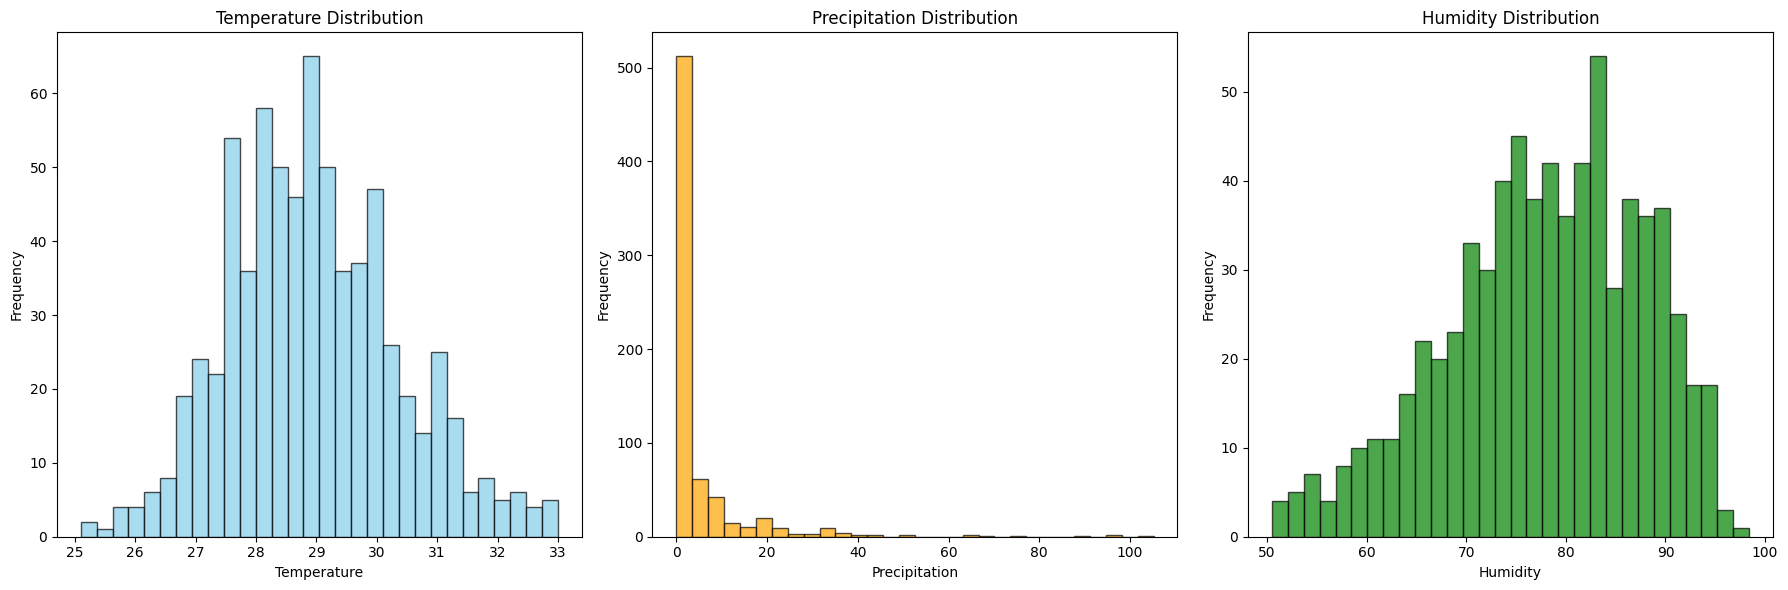

In [ ]:
# Set up the subplots for histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot temperature histogram
axes[0].hist(df['temp'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Frequency')

# Plot precipitation histogram
axes[1].hist(df['precip'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Precipitation Distribution')
axes[1].set_xlabel('Precipitation')
axes[1].set_ylabel('Frequency')

# Plot humidity histogram
axes[2].hist(df['humidity'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title('Humidity Distribution')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Biểu đồ thể hiện nhiệt độ (temp), độ ẩm (humidity) và khả năng mưa (precipprob) theo thời gian.

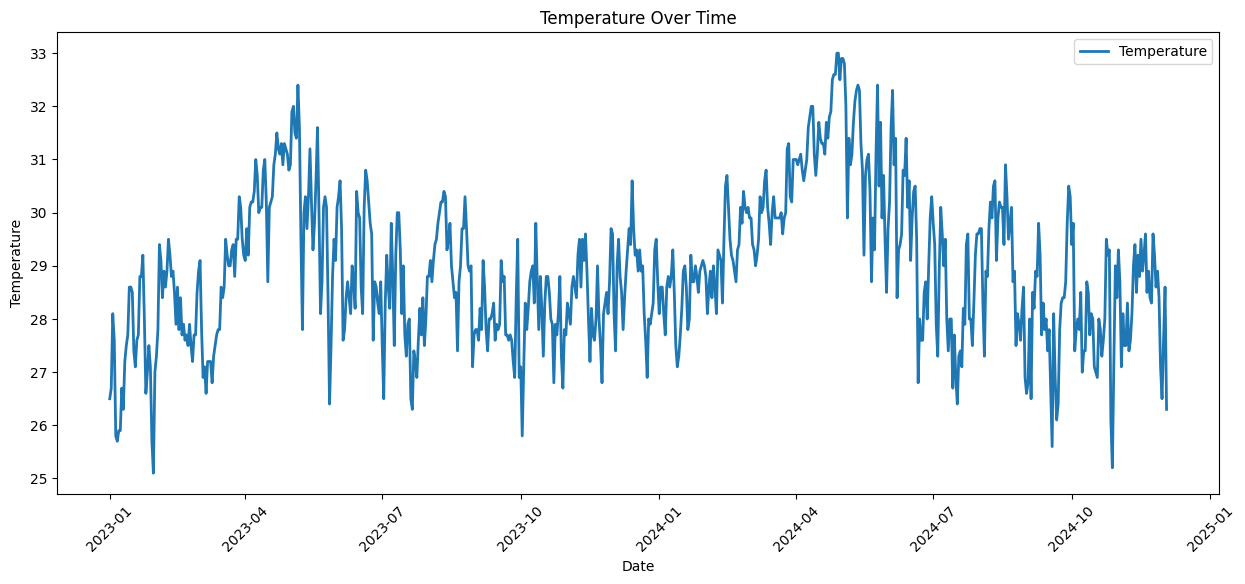

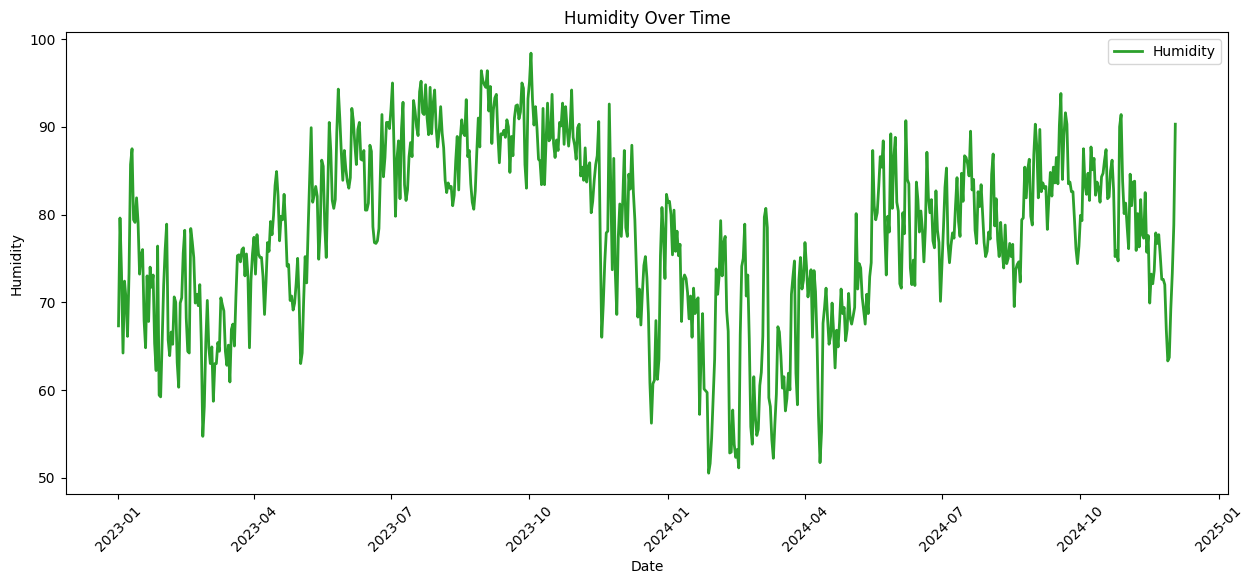

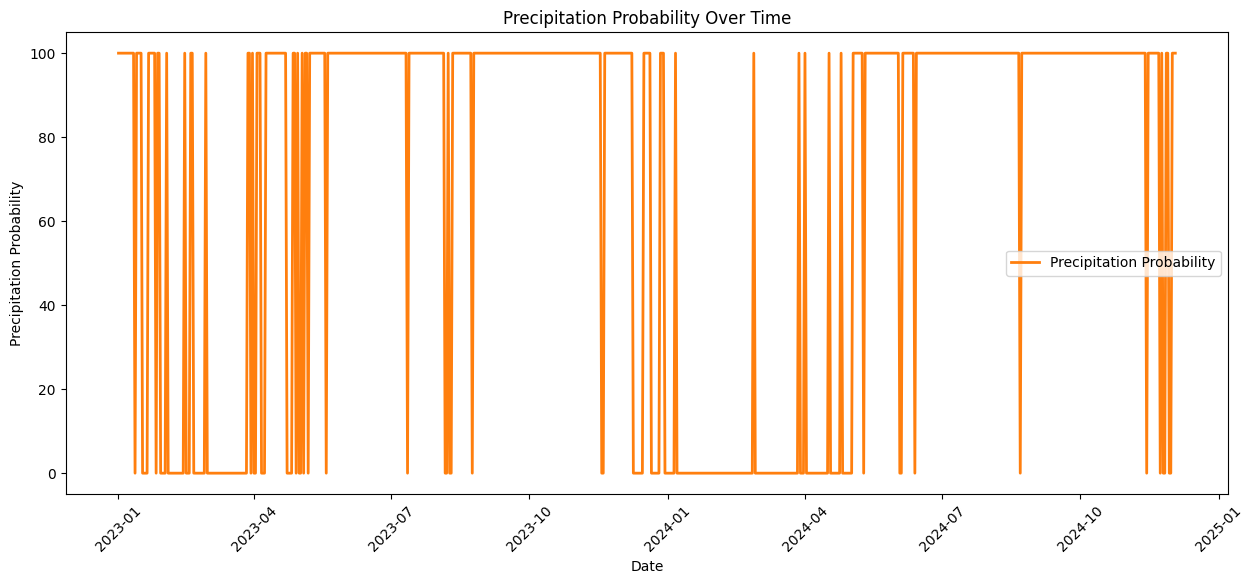

In [ ]:
# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Plot temp over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['temp'], label='Temperature', linewidth=2, color='tab:blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot humidity over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['humidity'], label='Humidity', linewidth=2, color='tab:green')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot precipprob over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['precipprob'], label='Precipitation Probability', linewidth=2, color='tab:orange')
plt.title('Precipitation Probability Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation Probability')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Biểu đồ cột biểu diển nhiệt độ (temp) trung bình và độ ẩm (humidity) trung bình theo preciptype (rain hay no rain)

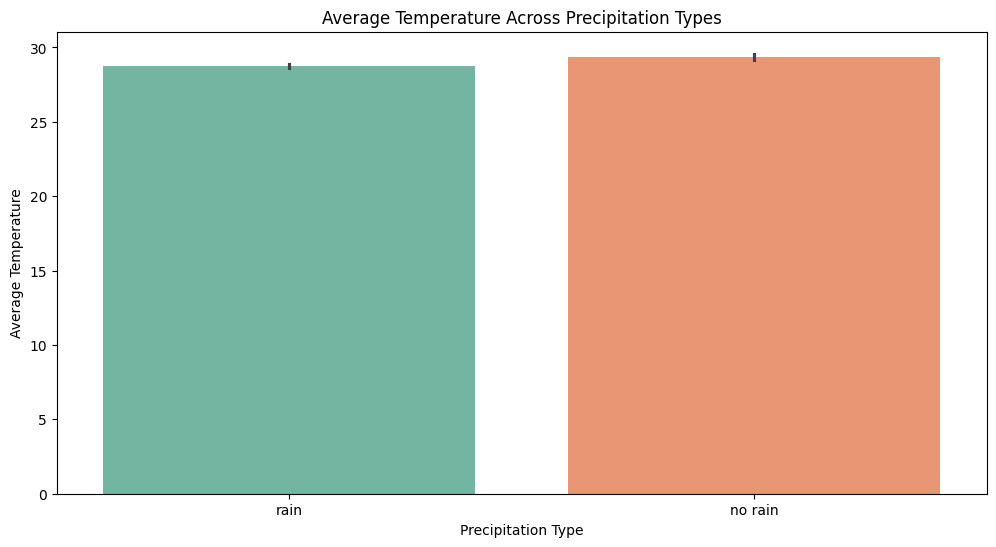

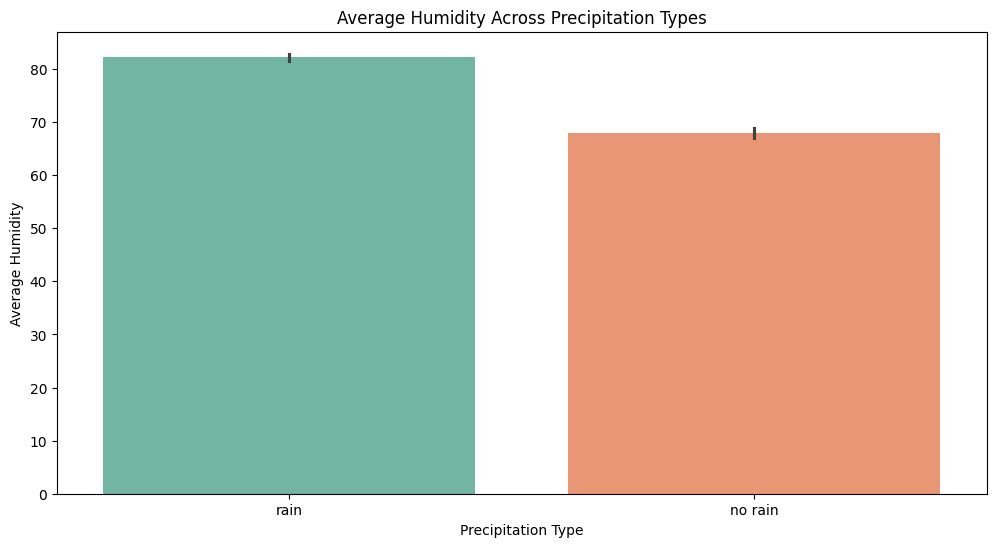

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for temp across preciptype
sns.barplot(data=df, x='preciptype', y='temp', estimator='mean', hue='preciptype', palette='Set2', legend=False)
plt.title('Average Temperature Across Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Average Temperature')
plt.show()

# Create a bar plot for humidity across preciptype
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='preciptype', y='humidity', estimator='mean', hue='preciptype', palette='Set2', legend=False)
plt.title('Average Humidity Across Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Average Humidity')
plt.show()


Biểu đồ tròn biểu diễn preciptype (rain và no rain)

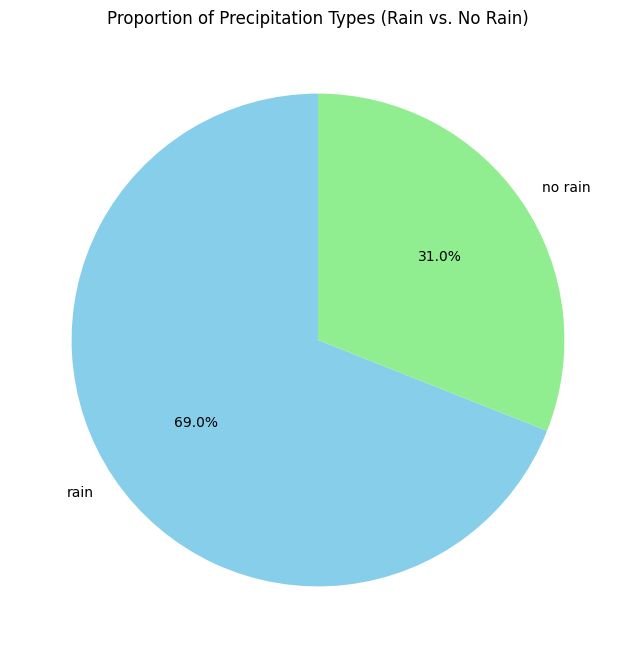

In [ ]:
# Calculate the proportion of each preciptype category
preciptype_counts = df['preciptype'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(preciptype_counts, labels=preciptype_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Precipitation Types (Rain vs. No Rain)')
plt.show()


**Mối quan hệ giữa các features**

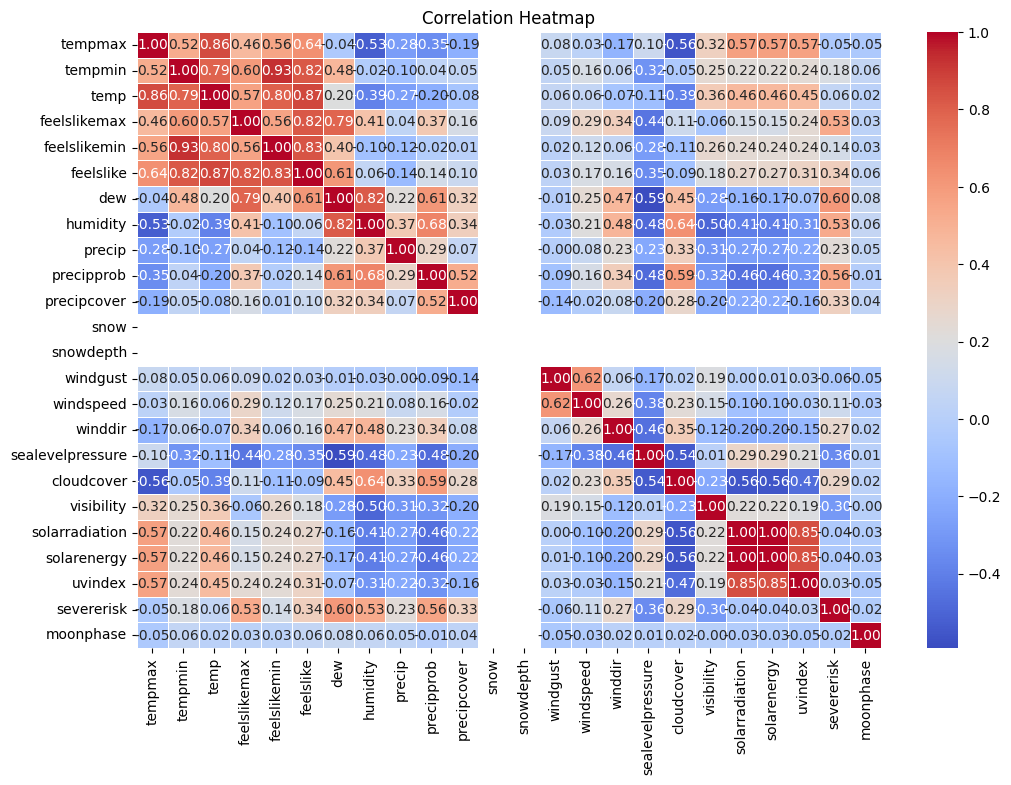

In [ ]:
# Lọc các cột có kiểu dữ liệu số (int hoặc float)
numerical_features = df.select_dtypes(include=['number'])
# Tính toán ma trận tương quan
correlation_matrix = df[numerical_features.columns].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Tiến hành xây dựng model và thực hiện bài toán dự đoán**

In [ ]:
# Chọn features đầu vào và mục tiêu (biến) để dự đoán
features = df[['tempmax', 'tempmin', 'windspeed', 'cloudcover', 'precip', 'dew', 'sealevelpressure']] # Đây sẽ là các features ta dựa vào để dự đoán targets
targets = df[['temp', 'precipprob', 'humidity']] # Đây là các biến mục tiêu mà ta sẽ dự đoán

# Scale features và targets
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_targets = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(features)
scaled_targets = scaler_targets.fit_transform(targets)

# Dịch chuyển targets để dự đoán bước thời gian tiếp theo
targets = targets.shift(-1)  # Dịch chuyển các giá trị mục tiêu đi 1 ngày

# Xóa các giá trị thiếu sau khi dịch chuyển
df = df.dropna()  # Xóa các dòng có giá trị bị thiếu

# Chia dữ liệu thành train và test set
train_size = int(len(df) * 0.8)  # 80% cho training, 20% cho testing
X_train, X_test = scaled_features[:train_size], scaled_features[train_size:]
y_train, y_test = scaled_targets[:train_size], scaled_targets[train_size:]

# Số bước thời gian cần look back
n_input = 30  # Dùng 30 bước thời gian trước để dự đoán giá trị tiếp theo
n_features = scaled_features.shape[1]

# Tạo TimeSeriesGenerator cho dữ liệu training
generator_train = TimeseriesGenerator(X_train, y_train, length=n_input, batch_size=32)

# Tạo TimeSeriesGenerator cho dữ liệu testing
generator_test = TimeseriesGenerator(X_test, y_test, length=n_input, batch_size=32)

**Model LSTM**

In [ ]:
# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model_lstm.add(Dense(3))
model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(generator_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2810

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2618
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0942
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0683
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0649
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0545
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0641
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0427
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0645
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0531
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0499


**Model GRU**

In [ ]:
#GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(n_input, n_features)))
model_gru.add(Dense(3))
model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(generator_train, epochs=10)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2729
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0986
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0997
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0894
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0808
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0842
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0774
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0679
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0666
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0695


**Model RNN**

In [ ]:
# RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(n_input, n_features)))
model_rnn.add(Dense(3))
model_rnn.compile(optimizer='adam', loss='mse')

history_rnn = model_rnn.fit(generator_train, epochs=10)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4137
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1037
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407


**Tiến hành dự đoán cho 3 Model LSTM, GRU và RNN**

In [ ]:
# Dự đoán trên tập test
predictions_rnn = model_rnn.predict(generator_test)
predictions_gru = model_gru.predict(generator_test)
predictions_lstm = model_lstm.predict(generator_test)

predictions_rnn_rescaled = scaler_targets.inverse_transform(predictions_rnn)
predictions_gru_rescaled = scaler_targets.inverse_transform(predictions_gru)
predictions_lstm_rescaled = scaler_targets.inverse_transform(predictions_lstm)

# In một số dự đoán để check (5 dự đoán)
print('RNN Predictions:', predictions_rnn_rescaled[:5])
print('GRU Predictions:', predictions_gru_rescaled[:5])
print('LSTM Predictions:', predictions_lstm_rescaled[:5])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RNN Predictions: [[29.901714 81.58482  76.92606 ]
 [30.279415 86.1347   79.570496]
 [30.336372 83.959625 79.33665 ]
 [29.222254 85.78092  76.126434]
 [29.460129 80.31434  76.43782 ]]
GRU Predictions: [[29.78033  86.609116 84.109825]
 [29.898088 86.485756 83.26782 ]
 [29.697859 89.29671  84.25381 ]
 [29.828785 86.02299  83.24087 ]
 [29.874863 82.60739  82.20643 ]]
LSTM Predictions: [[29.082228 82.05953  80.698975]
 [29.207699 81.520134 80.49831 ]
 [29.225739 81.98799  80.82427 ]
 [29.214718 80.11509  80.32414 ]
 [29.188408 78.41615  79.55708 ]]


**Đánh giá 3 Model trên**

In [ ]:
# Align the length of targets with predictions
test_targets = scaled_targets[train_size + n_input:]

# Tính MSE and R-squared cho các model RNN, GRU vàLSTM
mse_rnn = mean_squared_error(test_targets, predictions_rnn)
r2_rnn = r2_score(test_targets, predictions_rnn)

mse_gru = mean_squared_error(test_targets, predictions_gru)
r2_gru = r2_score(test_targets, predictions_gru)

mse_lstm = mean_squared_error(test_targets, predictions_lstm)
r2_lstm = r2_score(test_targets, predictions_lstm)

# Print MSE and R-squared cho các model
print(f'MSE RNN: {mse_rnn}, R-squared RNN: {r2_rnn}')
print(f'MSE GRU: {mse_gru}, R-squared GRU: {r2_gru}')
print(f'MSE LSTM: {mse_lstm}, R-squared LSTM: {r2_lstm}')

# print("Length of predictions (RNN):", len(predictions_rnn))
# print("Length of predictions (GRU):", len(predictions_gru))
# print("Length of predictions (LSTM):", len(predictions_lstm))

# expected_length = len(predictions_rnn)  # All prediction arrays should have the same length.
# target_length = len(scaled_targets[train_size + n_input:])
# print("Length of expected targets:", target_length)
# print("Length of predictions:", expected_length)



MSE RNN: 0.03515642354717652, R-squared RNN: -0.13589501230624543
MSE GRU: 0.04051407062176863, R-squared GRU: -0.36572950753130895
MSE LSTM: 0.031044947075690877, R-squared LSTM: 0.11047755609923855


**Vẽ biểu đồ đánh giá Model**

Đồ thị giá trị dự đoán so với giá trị thực tế

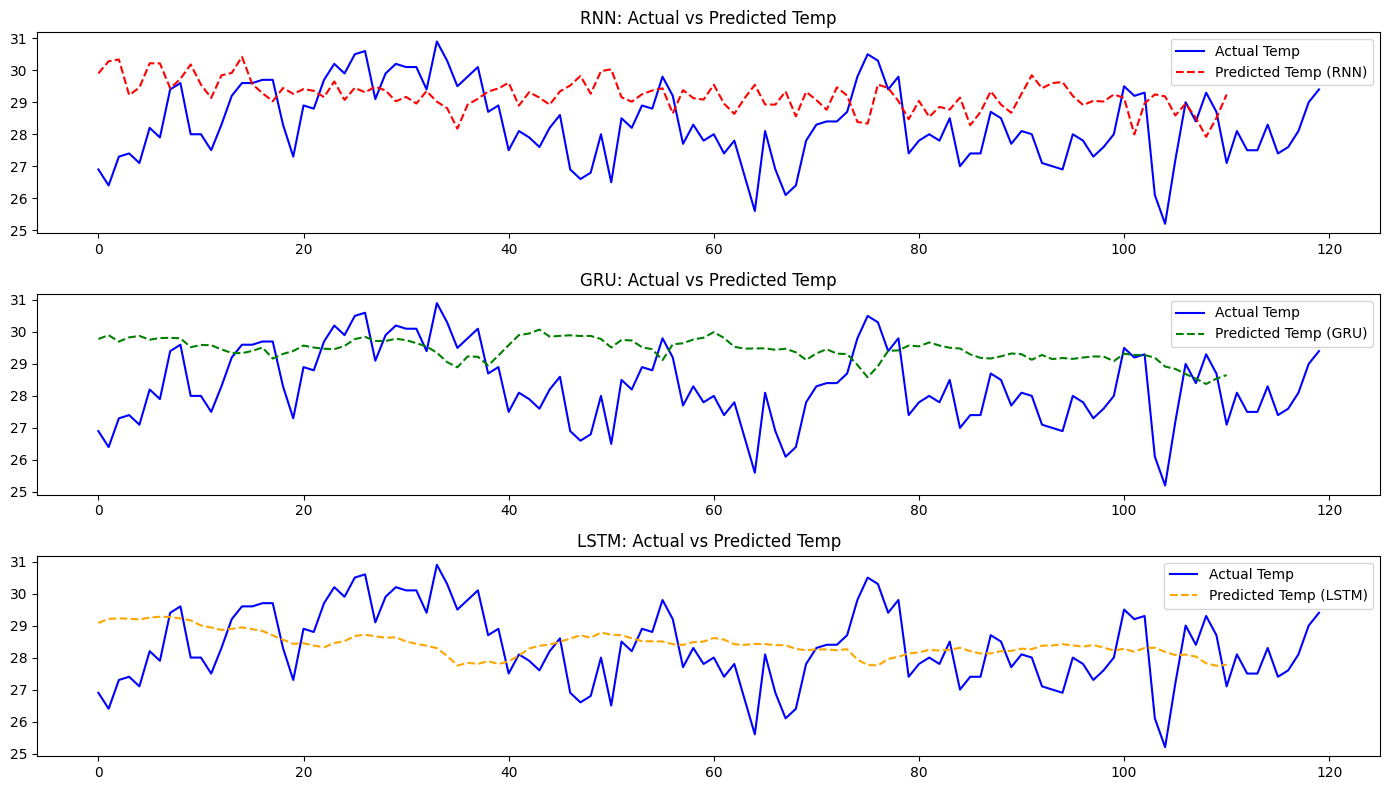

In [ ]:
# Sử dụng các giá trị thực tế từ y_test
y_test_rescaled = scaler_targets.inverse_transform(y_test)

# Lấy một số chỉ số để vẽ biểu đồ (ví dụ 120 bước đầu tiên)
n_points = 120  # Số điểm cần hiển thị

# Vẽ biểu đồ cho mỗi model
plt.figure(figsize=(14, 8))

# RNN predictions vs actual
plt.subplot(3, 1, 1)
plt.plot(y_test_rescaled[:n_points, 0], label="Actual Temp", color='blue')
plt.plot(predictions_rnn_rescaled[:n_points, 0], label="Predicted Temp (RNN)", color='red', linestyle='--')
plt.title('RNN: Actual vs Predicted Temp')
plt.legend()

# GRU predictions vs actual
plt.subplot(3, 1, 2)
plt.plot(y_test_rescaled[:n_points, 0], label="Actual Temp", color='blue')
plt.plot(predictions_gru_rescaled[:n_points, 0], label="Predicted Temp (GRU)", color='green', linestyle='--')
plt.title('GRU: Actual vs Predicted Temp')
plt.legend()

# LSTM predictions vs actual
plt.subplot(3, 1, 3)
plt.plot(y_test_rescaled[:n_points, 0], label="Actual Temp", color='blue')
plt.plot(predictions_lstm_rescaled[:n_points, 0], label="Predicted Temp (LSTM)", color='orange', linestyle='--')
plt.title('LSTM: Actual vs Predicted Temp')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


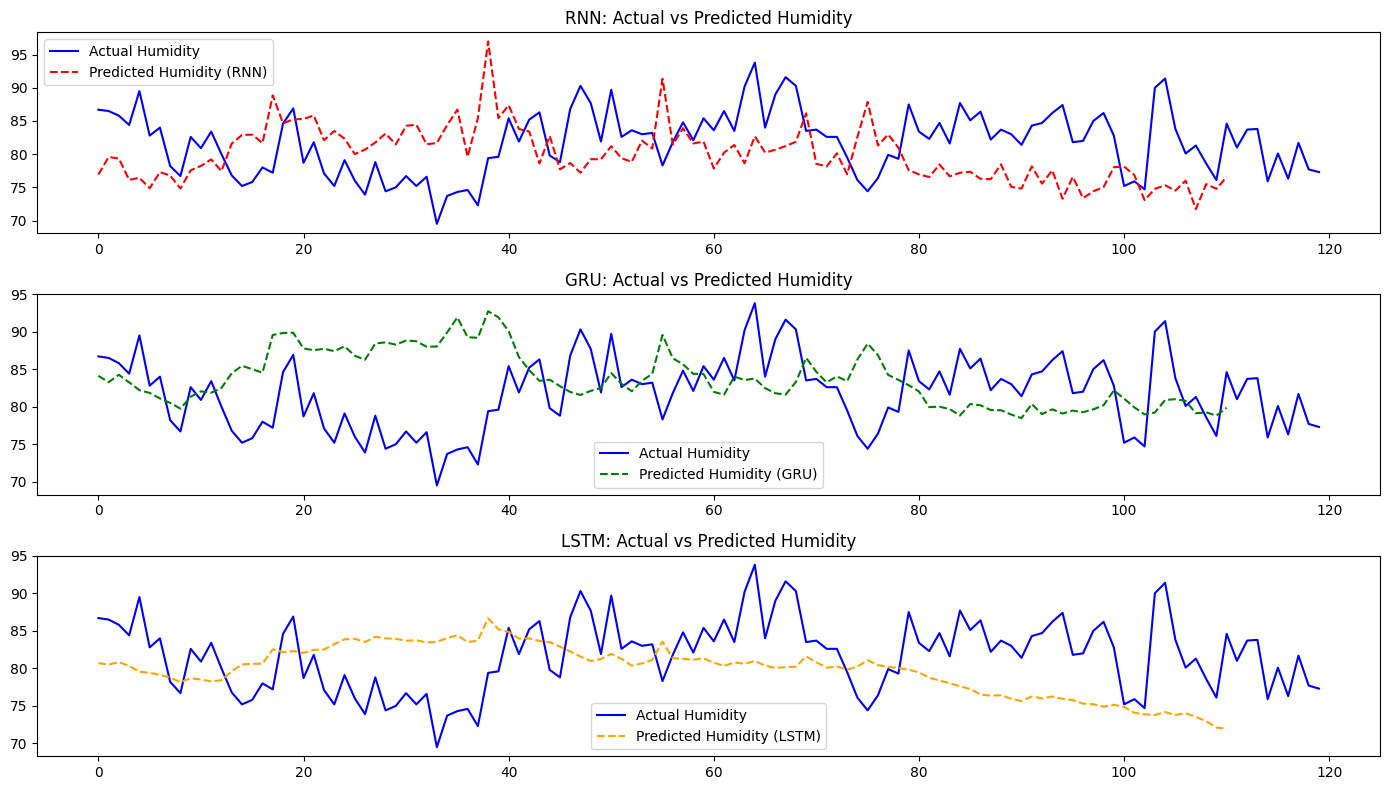

In [ ]:
# Vẽ biểu đồ cho mỗi model
plt.figure(figsize=(14, 8))

# RNN predictions vs actual
plt.subplot(3, 1, 1)
plt.plot(y_test_rescaled[:n_points, 2], label="Actual Humidity", color='blue')
plt.plot(predictions_rnn_rescaled[:n_points, 2], label="Predicted Humidity (RNN)", color='red', linestyle='--')
plt.title('RNN: Actual vs Predicted Humidity')
plt.legend()

# GRU predictions vs actual
plt.subplot(3, 1, 2)
plt.plot(y_test_rescaled[:n_points, 2], label="Actual Humidity", color='blue')
plt.plot(predictions_gru_rescaled[:n_points, 2], label="Predicted Humidity (GRU)", color='green', linestyle='--')
plt.title('GRU: Actual vs Predicted Humidity')
plt.legend()

# LSTM predictions vs actual
plt.subplot(3, 1, 3)
plt.plot(y_test_rescaled[:n_points, 2], label="Actual Humidity", color='blue')
plt.plot(predictions_lstm_rescaled[:n_points, 2], label="Predicted Humidity (LSTM)", color='orange', linestyle='--')
plt.title('LSTM: Actual vs Predicted Humidity')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

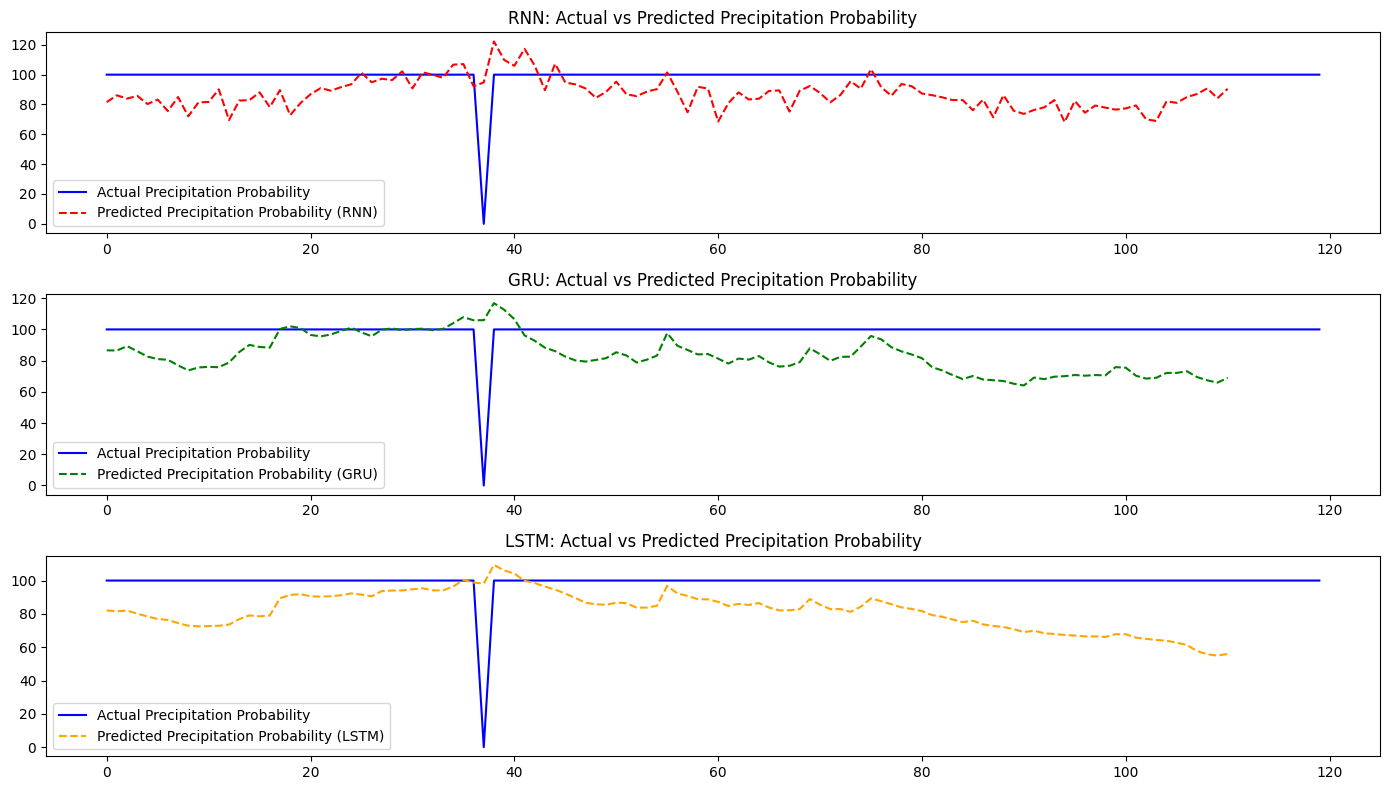

In [ ]:
# Vẽ biểu đồ cho mỗi model
plt.figure(figsize=(14, 8))

# RNN predictions vs actual
plt.subplot(3, 1, 1)
plt.plot(y_test_rescaled[:n_points, 1], label="Actual Precipitation Probability", color='blue')
plt.plot(predictions_rnn_rescaled[:n_points, 1], label="Predicted Precipitation Probability (RNN)", color='red', linestyle='--')
plt.title('RNN: Actual vs Predicted Precipitation Probability')
plt.legend()

# GRU predictions vs actual
plt.subplot(3, 1, 2)
plt.plot(y_test_rescaled[:n_points, 1], label="Actual Precipitation Probability", color='blue')
plt.plot(predictions_gru_rescaled[:n_points, 1], label="Predicted Precipitation Probability (GRU)", color='green', linestyle='--')
plt.title('GRU: Actual vs Predicted Precipitation Probability')
plt.legend()

# LSTM predictions vs actual
plt.subplot(3, 1, 3)
plt.plot(y_test_rescaled[:n_points, 1], label="Actual Precipitation Probability", color='blue')
plt.plot(predictions_lstm_rescaled[:n_points, 1], label="Predicted Precipitation Probability (LSTM)", color='orange', linestyle='--')
plt.title('LSTM: Actual vs Predicted Precipitation Probability')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Biểu đồ mất mát qua các epochs cho mỗi mô hình

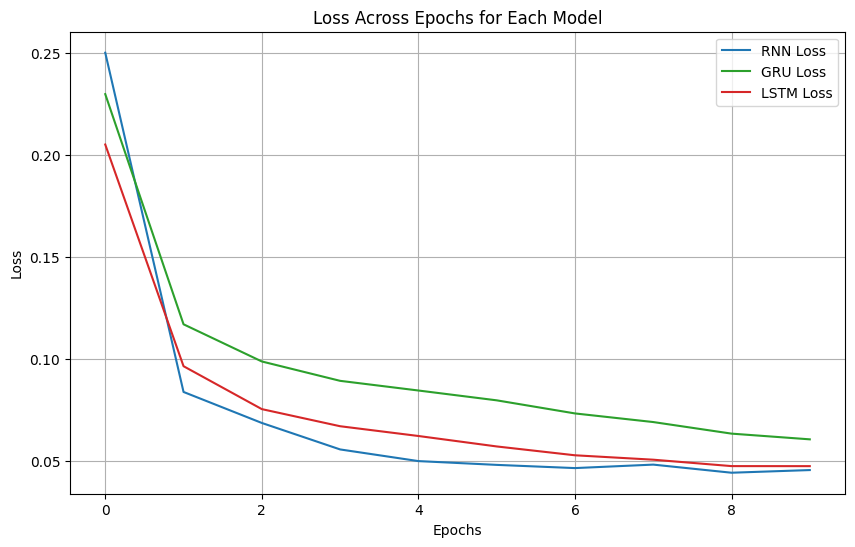

In [ ]:
# Plot loss across epochs for each model
plt.figure(figsize=(10, 6))

# RNN Loss
plt.plot(history_rnn.history['loss'], label='RNN Loss', color='tab:blue')

# GRU Loss
plt.plot(history_gru.history['loss'], label='GRU Loss', color='tab:green')

# LSTM Loss
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='tab:red')

plt.title('Loss Across Epochs for Each Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Biểu đồ đánh giá MSE và R-Squared

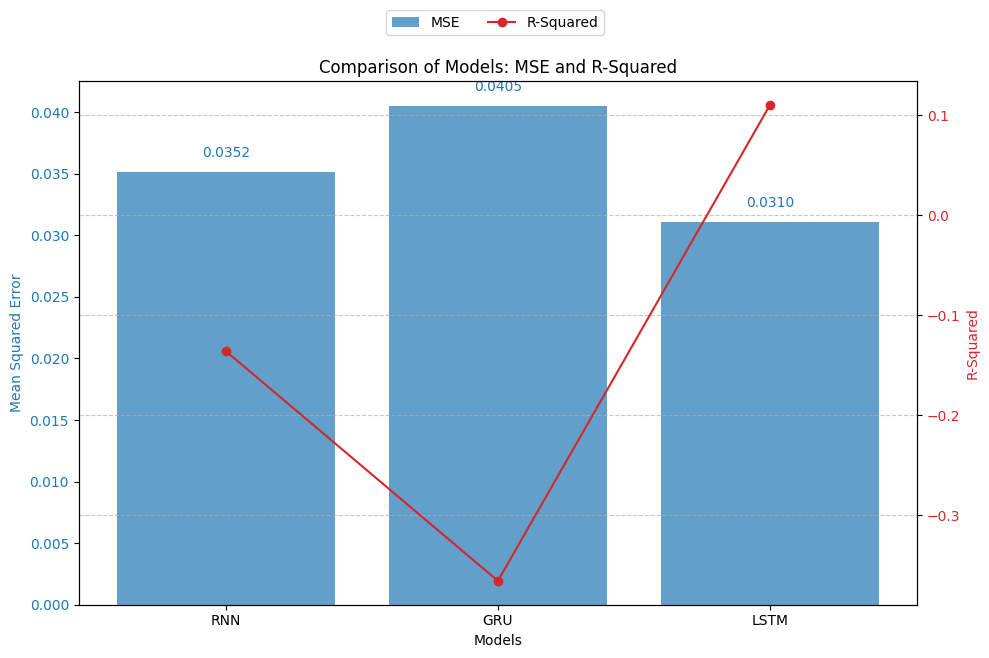

In [ ]:
# MSE và R-squared
models = ['RNN', 'GRU', 'LSTM']
mse_values = [mse_rnn, mse_gru, mse_lstm]
r2_values = [r2_rnn, r2_gru, r2_lstm]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error', color=color)
bars = ax1.bar(models, mse_values, color=color, alpha=0.7, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

for bar, v in zip(bars, mse_values):
    ax1.text(bar.get_x() + bar.get_width() / 2, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10, color=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R-Squared', color=color)
ax2.plot(models, r2_values, color=color, marker='o', label='R-Squared')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.title('Comparison of Models: MSE and R-Squared')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models)

# Hiển thị biểu đồ
plt.show()


- RNN có MSE thấp hơn GRU, thêm vào đó R² âm cho thấy hiệu suất kém vì nó không nắm bắt tốt các mẫu dữ liệu kiểu time-series.
- GRU lại có MSE cao nhất trong cả 3 model thêm vào đó R² lại âm và thấp nhất trong cả 3 cho thấy nó hoạt động kém trên tập dữ liệu này.
- LSTM có MSE thấp nhất và R² cao nhất trong cả 3 model, cho thấy nó là model hợp nhất trong cả 3 cho tập dataset này.
